# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [4]:
# Dicionário de regiões para mapping:
dados_ro = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin_1')
regioes_map = dict(zip(dados_ro['municipio'], dados_ro['regiao']))
regioes_map

{"Alta Floresta D'Oeste": 'Cacoal',
 'Alto Alegre dos Parecis': 'Cacoal',
 'Alto Paraíso': 'Ariquemes',
 "Alvorada D'Oeste": 'Ji-Paraná',
 'Ariquemes': 'Ariquemes',
 'Buritis': 'Ariquemes',
 'Cabixi': 'Vilhena',
 'Cacaulândia': 'Ariquemes',
 'Cacoal': 'Cacoal',
 'Campo Novo de Rondônia': 'Ariquemes',
 'Candeias do Jamari': 'Porto Velho',
 'Castanheiras': 'Cacoal',
 'Cerejeiras': 'Vilhena',
 'Chupinguaia': 'Vilhena',
 'Colorado do Oeste': 'Vilhena',
 'Corumbiara': 'Vilhena',
 'Costa Marques': 'Ji-Paraná',
 'Cujubim': 'Ariquemes',
 "Espigão D'Oeste": 'Cacoal',
 'Governador Jorge Teixeira': 'Jaru',
 'Guajará-Mirim': 'Porto Velho',
 'Itapuã do Oeste': 'Porto Velho',
 'Jaru': 'Jaru',
 'Ji-Paraná': 'Ji-Paraná',
 "Machadinho D'Oeste": 'Jaru',
 'Ministro Andreazza': 'Cacoal',
 'Mirante da Serra': 'Ji-Paraná',
 'Monte Negro': 'Ariquemes',
 "Nova Brasilândia D'Oeste": 'Cacoal',
 'Nova Mamoré': 'Porto Velho',
 'Nova União': 'Ji-Paraná',
 'Novo Horizonte do Oeste': 'Cacoal',
 'Ouro Preto do Oeste'

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
#banco de dados reduzido
sinasc_1 = sinasc_raw[['munResLat', 'CONSULTAS', 'IDADEMAE', 'HORANASC']]
# Definir uma função para mapear os valores de latitude, com isso nóps podemos utilizar para qualquer valor de Lat
def mapear_latitude(lat):
    return 'Lat_alta' if lat >= -10.5 else 'Lat_baixa'

In [6]:
sinasc_1.describe()

,munResLat,CONSULTAS,IDADEMAE,HORANASC
count,27027.000000,27028.000000,27028.000000,27007.000000
mean,-10.377988,3.576402,26.093718,1267.470026
std,1.372942,0.788492,6.387094,574.922266
min,-13.499760,1.000000,11.000000,0.000000
25%,-11.433870,3.000000,21.000000,905.000000
50%,-10.435950,4.000000,26.000000,1230.000000
75%,-8.768890,4.000000,31.000000,1715.000000
max,-8.768890,9.000000,53.000000,2359.000000


In [7]:
sinasc_1.groupby(sinasc_1['munResLat'].apply(mapear_latitude)).agg({
    'IDADEMAE': [('mínimo', 'min'), ('máximo', 'max')],
    'CONSULTAS': [('soma', 'sum')],
    'HORANASC': [('média', 'mean')]
})

IDADEMAE        CONSULTAS     HORANASC
            mínimo máximo      soma        média
munResLat                                       
Lat_alta        11     52     48662  1270.756755
Lat_baixa       12     53     48001  1263.918182

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [8]:
#vamos suar a mesma logica que antes
#banco de dados reduzido
sinasc_2 = sinasc_raw[['munResArea', 'CONSULTAS', 'QTDGESTANT', 'HORANASC']]
# Definir uma função para mapear os valores de area, podendo usar para qualquer valor de area.
def mapear_area(area):
    return 'area_grande' if area >= 3000 else 'area_pequena'

In [9]:
sinasc_2.groupby(sinasc_2['munResArea'].apply(mapear_area)).agg({
    'QTDGESTANT': [('mínimo', 'min'), ('máximo', 'max'), ('mediana', np.median),('média', 'mean'),('desvio','std'),('variancia', 'var')],
    'CONSULTAS': [('soma', 'sum')],
    'HORANASC': [('média', 'mean')]
})

QTDGESTANT                                               \
                 mínimo máximo mediana     média    desvio variancia   
munResArea                                                             
area_grande         0.0   52.0     1.0  1.310368  1.447429  2.095052   
area_pequena        0.0    9.0     1.0  1.134467  1.208857  1.461335   

             CONSULTAS     HORANASC  
                  soma        média  
munResArea                           
area_grande      77142  1271.696059  
area_pequena     19521  1249.789635

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [10]:
#bacno de dados reduzido
sinasc_3 = sinasc_raw[['munResAlt', 'QTDPARTCES' ,'QTDPARTNOR' ]]

In [11]:
#Separando em 4 partes iguais o munResAlt. 
area = pd.qcut(sinasc_3['munResAlt'], 4)


In [12]:
sinasc_3.groupby(area)[['QTDPARTCES' ,'QTDPARTNOR' ]].agg(['min', 'max', np.median, 'mean','std', 'var'])

QTDPARTCES                                             \
                      min   max median      mean       std       var   
munResAlt                                                              
(84.999, 87.0]        0.0  12.0    0.0  0.448773  0.735847  0.541471   
(87.0, 153.0]         0.0   4.0    0.0  0.519368  0.736689  0.542711   
(153.0, 191.0]        0.0  12.0    0.0  0.517727  0.750559  0.563339   
(191.0, 595.0]        0.0   5.0    0.0  0.608860  0.751648  0.564974   

               QTDPARTNOR                                             
                      min   max median      mean       std       var  
munResAlt                                                             
(84.999, 87.0]        0.0  40.0    0.0  0.801917  1.380931  1.906970  
(87.0, 153.0]         0.0  14.0    0.0  0.744107  1.330296  1.769689  
(153.0, 191.0]        0.0   9.0    0.0  0.423877  0.917432  0.841681  
(191.0, 595.0]        0.0  41.0    0.0  0.370096  1.116704  1.247029

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [13]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [14]:
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

In [15]:
# criar coluna com mes
sinasc_raw.loc[:,'DTNASC_mes'] = sinasc_raw['DTNASC'].dt.month

In [16]:
nasc_4 = sinasc_raw[['IDADEMAE','munResNome','DTNASC_mes']]

In [18]:
nasc_4.set_index('munResNome', inplace = True)

In [19]:
print(sinasc_raw['DTNASC'].head())

0   2019-02-19
1   2019-02-21
2   2019-02-25
3   2019-03-20
4   2019-03-23
Name: DTNASC, dtype: datetime64[ns]


<AxesSubplot:xlabel='munResNome,DTNASC_mes'>

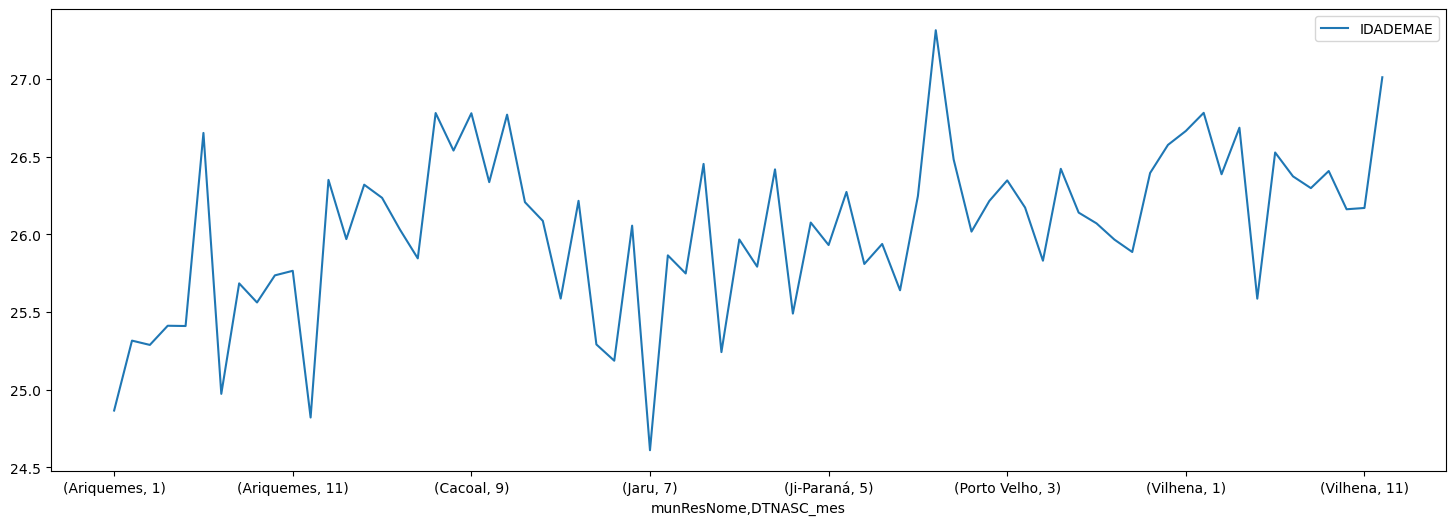

In [20]:
# Agrupa por município e mes, calcula a média da idade da mãe
nasc_4.groupby([imediatas,'DTNASC_mes'])[['IDADEMAE']].mean().plot(figsize=[18,6])

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [21]:
regioes_idh = dict(zip(dados_ro['municipio'], dados_ro['idh']))
regioes_idh

{"Alta Floresta D'Oeste": 0.641,
 'Alto Alegre dos Parecis': 0.592,
 'Alto Paraíso': 0.625,
 "Alvorada D'Oeste": 0.643,
 'Ariquemes': 0.702,
 'Buritis': 0.616,
 'Cabixi': 0.65,
 'Cacaulândia': 0.646,
 'Cacoal': 0.718,
 'Campo Novo de Rondônia': 0.593,
 'Candeias do Jamari': 0.649,
 'Castanheiras': 0.658,
 'Cerejeiras': 0.692,
 'Chupinguaia': 0.652,
 'Colorado do Oeste': 0.685,
 'Corumbiara': 0.613,
 'Costa Marques': 0.611,
 'Cujubim': 0.612,
 "Espigão D'Oeste": 0.672,
 'Governador Jorge Teixeira': 0.596,
 'Guajará-Mirim': 0.657,
 'Itapuã do Oeste': 0.614,
 'Jaru': 0.689,
 'Ji-Paraná': 0.714,
 "Machadinho D'Oeste": 0.596,
 'Ministro Andreazza': 0.638,
 'Mirante da Serra': 0.643,
 'Monte Negro': 0.607,
 "Nova Brasilândia D'Oeste": 0.643,
 'Nova Mamoré': 0.587,
 'Nova União': 0.587,
 'Novo Horizonte do Oeste': 0.634,
 'Ouro Preto do Oeste': 0.682,
 'Parecis': 0.617,
 'Pimenta Bueno': 0.71,
 'Pimenteiras do Oeste': 0.665,
 'Porto Velho': 0.736,
 'Presidente Médici': 0.664,
 'Primavera de R

In [24]:
# criar DF a partir do dicionario e transpor
df_idh =pd.DataFrame([regioes_idh]).T
# renopmear coluna para IDH
df_idh.rename(columns={0:'IDH'}, inplace = True)
df_idh

,IDH
Alta Floresta D'Oeste,0.641
Alto Alegre dos Parecis,0.592
Alto Paraíso,0.625
Alvorada D'Oeste,0.643
Ariquemes,0.702
Buritis,0.616
Cabixi,0.650
Cacaulândia,0.646
Cacoal,0.718
Campo Novo de Rondônia,0.593


In [28]:
#função para classificar as linhas de idh
def classificar_idh(IDH):
  if IDH >= 0.8:
    return "IDH Muito Alto"
  elif IDH >= 0.7:
    return "IDH Alto"
  elif IDH >= 0.6:
    return "IDH Médio"
  elif IDH >= 0.5:
    return "IDH Baixo"
  else:
    return "IDH Muito Baixo"


In [29]:
# Criando uma nova coluna utilizando a função criada para classificar o IDH
df_idh['classificacao_idh'] = df_idh['IDH'].apply(classificar_idh)

In [30]:
df_idh

,IDH,classificacao_idh
Alta Floresta D'Oeste,0.641,IDH Médio
Alto Alegre dos Parecis,0.592,IDH Baixo
Alto Paraíso,0.625,IDH Médio
Alvorada D'Oeste,0.643,IDH Médio
Ariquemes,0.702,IDH Alto
Buritis,0.616,IDH Médio
Cabixi,0.650,IDH Médio
Cacaulândia,0.646,IDH Médio
Cacoal,0.718,IDH Alto
Campo Novo de Rondônia,0.593,IDH Baixo


In [32]:
# vamos remover a coluna de IDH e deixar apenas a coluna de calssificação
df_idh_dic = df_idh.drop(columns = 'IDH')
#transformando o df em dict para ussar o mapping]
df_idh_dic = df_idh_dic.to_dict()
df_idh_dic

{'classificacao_idh': {"Alta Floresta D'Oeste": 'IDH Médio',
  'Alto Alegre dos Parecis': 'IDH Baixo',
  'Alto Paraíso': 'IDH Médio',
  "Alvorada D'Oeste": 'IDH Médio',
  'Ariquemes': 'IDH Alto',
  'Buritis': 'IDH Médio',
  'Cabixi': 'IDH Médio',
  'Cacaulândia': 'IDH Médio',
  'Cacoal': 'IDH Alto',
  'Campo Novo de Rondônia': 'IDH Baixo',
  'Candeias do Jamari': 'IDH Médio',
  'Castanheiras': 'IDH Médio',
  'Cerejeiras': 'IDH Médio',
  'Chupinguaia': 'IDH Médio',
  'Colorado do Oeste': 'IDH Médio',
  'Corumbiara': 'IDH Médio',
  'Costa Marques': 'IDH Médio',
  'Cujubim': 'IDH Médio',
  "Espigão D'Oeste": 'IDH Médio',
  'Governador Jorge Teixeira': 'IDH Baixo',
  'Guajará-Mirim': 'IDH Médio',
  'Itapuã do Oeste': 'IDH Médio',
  'Jaru': 'IDH Médio',
  'Ji-Paraná': 'IDH Alto',
  "Machadinho D'Oeste": 'IDH Baixo',
  'Ministro Andreazza': 'IDH Médio',
  'Mirante da Serra': 'IDH Médio',
  'Monte Negro': 'IDH Médio',
  "Nova Brasilândia D'Oeste": 'IDH Médio',
  'Nova Mamoré': 'IDH Baixo',
  

In [33]:
#df reduzido para aplicar o mapping
sinasc_5 = sinasc_raw[['ESCMAE', 'IDADEMAE','munResNome']]

In [34]:
sinasc_5.set_index('munResNome', inplace = True)

In [36]:
sinasc_5.groupby([df_idh_dic['classificacao_idh'],'ESCMAE'])[['IDADEMAE']].mean()

IDADEMAE
munResNome ESCMAE                    
IDH Alto   1 a 3 anos       28.143357
           12 anos ou mais  29.765963
           4 a 7 anos       24.120684
           8 a 11 anos      25.288771
           Nenhuma          30.739130
IDH Baixo  1 a 3 anos       28.918367
           12 anos ou mais  28.756757
           4 a 7 anos       24.691211
           8 a 11 anos      24.707734
           Nenhuma          30.333333
IDH Médio  1 a 3 anos       28.751381
           12 anos ou mais  29.042076
           4 a 7 anos       25.468627
           8 a 11 anos      24.992976
           Nenhuma          33.214286

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [37]:
regioes_ifdm = dict(zip(dados_ro['municipio'], dados_ro['ifdm']))
regioes_ifdm

{"Alta Floresta D'Oeste": 0.6337,
 'Alto Alegre dos Parecis': 0.5046,
 'Alto Paraíso': 0.5735,
 "Alvorada D'Oeste": 0.5919,
 'Ariquemes': 0.7746,
 'Buritis': 0.6199,
 'Cabixi': 0.5887,
 'Cacaulândia': 0.5721,
 'Cacoal': 0.7111,
 'Campo Novo de Rondônia': 0.5272,
 'Candeias do Jamari': 0.6199,
 'Castanheiras': 0.543,
 'Cerejeiras': 0.6137,
 'Chupinguaia': 0.6766,
 'Colorado do Oeste': 0.6473,
 'Corumbiara': 0.5759,
 'Costa Marques': 0.5626,
 'Cujubim': 0.5055,
 "Espigão D'Oeste": 0.5973,
 'Governador Jorge Teixeira': 0.4562,
 'Guajará-Mirim': 0.5541,
 'Itapuã do Oeste': 0.5903,
 'Jaru': 0.645,
 'Ji-Paraná': 0.7117,
 "Machadinho D'Oeste": 0.5322,
 'Ministro Andreazza': 0.5657,
 'Mirante da Serra': 0.5519,
 'Monte Negro': 0.6016,
 "Nova Brasilândia D'Oeste": 0.5857,
 'Nova Mamoré': 0.5084,
 'Nova União': 0.5571,
 'Novo Horizonte do Oeste': 0.5858,
 'Ouro Preto do Oeste': 0.6261,
 'Parecis': 0.5502,
 'Pimenta Bueno': 0.7383,
 'Pimenteiras do Oeste': 0.6501,
 'Porto Velho': 0.7257,
 'Presid

In [38]:
# criar DF a partir do dicionario e transpor
df_ifdm =pd.DataFrame([regioes_ifdm]).T
# renopmear coluna para ifdm
df_ifdm.rename(columns={0:'ifdm'}, inplace = True)
df_ifdm

,ifdm
Alta Floresta D'Oeste,0.6337
Alto Alegre dos Parecis,0.5046
Alto Paraíso,0.5735
Alvorada D'Oeste,0.5919
Ariquemes,0.7746
Buritis,0.6199
Cabixi,0.5887
Cacaulândia,0.5721
Cacoal,0.7111
Campo Novo de Rondônia,0.5272


In [40]:
#função para classificar as linhas de ifdm ( indice de desenvolvimento municipal):
def classificar_ifdm(ifdm):
  if ifdm >= 0.8:
    return "Alto"
  elif ifdm >= 0.6:
    return "Moderado"
  elif ifdm >= 0.4:
    return "Regular"
  else: 
    return "Baixo"
  


In [41]:
# Criando uma nova coluna utilizando a função criada para classificar o IDH
df_ifdm['classificacao_ifdm'] = df_ifdm['ifdm'].apply(classificar_ifdm)

In [42]:
df_ifdm

,ifdm,classificacao_ifdm
Alta Floresta D'Oeste,0.6337,Moderado
Alto Alegre dos Parecis,0.5046,Regular
Alto Paraíso,0.5735,Regular
Alvorada D'Oeste,0.5919,Regular
Ariquemes,0.7746,Moderado
Buritis,0.6199,Moderado
Cabixi,0.5887,Regular
Cacaulândia,0.5721,Regular
Cacoal,0.7111,Moderado
Campo Novo de Rondônia,0.5272,Regular


In [43]:
# vamos remover a coluna de IDH e deixar apenas a coluna de calssificação
df_ifdm_dic = df_ifdm.drop(columns = 'ifdm')
#transformando o df em dict para ussar o mapping]
df_ifdm_dic = df_ifdm_dic.to_dict()
df_ifdm_dic

{'classificacao_ifdm': {"Alta Floresta D'Oeste": 'Moderado',
  'Alto Alegre dos Parecis': 'Regular',
  'Alto Paraíso': 'Regular',
  "Alvorada D'Oeste": 'Regular',
  'Ariquemes': 'Moderado',
  'Buritis': 'Moderado',
  'Cabixi': 'Regular',
  'Cacaulândia': 'Regular',
  'Cacoal': 'Moderado',
  'Campo Novo de Rondônia': 'Regular',
  'Candeias do Jamari': 'Moderado',
  'Castanheiras': 'Regular',
  'Cerejeiras': 'Moderado',
  'Chupinguaia': 'Moderado',
  'Colorado do Oeste': 'Moderado',
  'Corumbiara': 'Regular',
  'Costa Marques': 'Regular',
  'Cujubim': 'Regular',
  "Espigão D'Oeste": 'Regular',
  'Governador Jorge Teixeira': 'Regular',
  'Guajará-Mirim': 'Regular',
  'Itapuã do Oeste': 'Regular',
  'Jaru': 'Moderado',
  'Ji-Paraná': 'Moderado',
  "Machadinho D'Oeste": 'Regular',
  'Ministro Andreazza': 'Regular',
  'Mirante da Serra': 'Regular',
  'Monte Negro': 'Moderado',
  "Nova Brasilândia D'Oeste": 'Regular',
  'Nova Mamoré': 'Regular',
  'Nova União': 'Regular',
  'Novo Horizonte do

In [44]:
#usando o mesmo df anterior mas mapeando por outro dicionario. 
sinasc_5.groupby([df_ifdm_dic['classificacao_ifdm'],'ESCMAE'])[['IDADEMAE']].mean()

IDADEMAE
munResNome ESCMAE                    
Moderado   1 a 3 anos       28.268354
           12 anos ou mais  29.642548
           4 a 7 anos       24.468271
           8 a 11 anos      25.238845
           Nenhuma          30.500000
Regular    1 a 3 anos       28.958678
           12 anos ou mais  28.842878
           4 a 7 anos       25.055254
           8 a 11 anos      24.796865
           Nenhuma          34.800000

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [45]:
regioes_pib = dict(zip(dados_ro['municipio'], dados_ro['pib']))
regioes_pib

{"Alta Floresta D'Oeste": 496000,
 'Alto Alegre dos Parecis': 213410,
 'Alto Paraíso': 358000,
 "Alvorada D'Oeste": 204098,
 'Ariquemes': 2579830,
 'Buritis': 726000,
 'Cabixi': 113031,
 'Cacaulândia': 116635,
 'Cacoal': 2261644,
 'Campo Novo de Rondônia': 208821,
 'Candeias do Jamari': 548000,
 'Castanheiras': 59779,
 'Cerejeiras': 507000,
 'Chupinguaia': 190331,
 'Colorado do Oeste': 335000,
 'Corumbiara': 188218,
 'Costa Marques': 171878,
 'Cujubim': 385000,
 "Espigão D'Oeste": 625000,
 'Governador Jorge Teixeira': 148027,
 'Guajará-Mirim': 893000,
 'Itapuã do Oeste': 129351,
 'Jaru': 1500890,
 'Ji-Paraná': 3783972,
 "Machadinho D'Oeste": 633000,
 'Ministro Andreazza': 174633,
 'Mirante da Serra': 163955,
 'Monte Negro': 219152,
 "Nova Brasilândia D'Oeste": 360000,
 'Nova Mamoré': 529000,
 'Nova União': 92346,
 'Novo Horizonte do Oeste': 129399,
 'Ouro Preto do Oeste': 834000,
 'Parecis': 80759,
 'Pimenta Bueno': 1164877,
 'Pimenteiras do Oeste': 76756,
 'Porto Velho': 17912070,
 'P

In [46]:
# criar DF a partir do dicionario e transpor
df_PIB =pd.DataFrame([regioes_pib]).T
# renopmear coluna para PIB
df_PIB.rename(columns={0:'PIB'}, inplace = True)
df_PIB

,PIB
Alta Floresta D'Oeste,496000
Alto Alegre dos Parecis,213410
Alto Paraíso,358000
Alvorada D'Oeste,204098
Ariquemes,2579830
Buritis,726000
Cabixi,113031
Cacaulândia,116635
Cacoal,2261644
Campo Novo de Rondônia,208821


In [51]:
#função para classificar as linhas de PIBm ( Produto interno Bruto):
def classificar_PIB(PIB):
  if PIB >= 1000000:
    return "Acima de 1 Bilhão"
  elif PIB >= 500000:
    return "Acima de 500 Milhões"
  elif PIB >= 300000:
    return "Acima de 300 Milhões"
  elif PIB >= 200000:
    return "Acima de 200 Milhões"
  elif PIB >= 100000:
    return "Acima de 100 Milhões"
  else: 
    return "Até 100 Milhões"
  


In [52]:
# Criando uma nova coluna utilizando a função criada para classificar o IDH
df_PIB['classificacao_PIB'] = df_PIB['PIB'].apply(classificar_PIB)

In [53]:
# vamos remover a coluna de IDH e deixar apenas a coluna de calssificação
df_PIB_dic = df_PIB.drop(columns = 'PIB')
#transformando o df em dict para ussar o mapping]
df_PIB_dic = df_PIB_dic.to_dict()
df_PIB_dic

{'classificacao_PIB': {"Alta Floresta D'Oeste": 'Acima de 300 Milhões',
  'Alto Alegre dos Parecis': 'Acima de 200 Milhões',
  'Alto Paraíso': 'Acima de 300 Milhões',
  "Alvorada D'Oeste": 'Acima de 200 Milhões',
  'Ariquemes': 'Acima de 1 Bilhão',
  'Buritis': 'Acima de 500 Milhões',
  'Cabixi': 'Acima de 100 Milhões',
  'Cacaulândia': 'Acima de 100 Milhões',
  'Cacoal': 'Acima de 1 Bilhão',
  'Campo Novo de Rondônia': 'Acima de 200 Milhões',
  'Candeias do Jamari': 'Acima de 500 Milhões',
  'Castanheiras': 'Até 100 Milhões',
  'Cerejeiras': 'Acima de 500 Milhões',
  'Chupinguaia': 'Acima de 100 Milhões',
  'Colorado do Oeste': 'Acima de 300 Milhões',
  'Corumbiara': 'Acima de 100 Milhões',
  'Costa Marques': 'Acima de 100 Milhões',
  'Cujubim': 'Acima de 300 Milhões',
  "Espigão D'Oeste": 'Acima de 500 Milhões',
  'Governador Jorge Teixeira': 'Acima de 100 Milhões',
  'Guajará-Mirim': 'Acima de 500 Milhões',
  'Itapuã do Oeste': 'Acima de 100 Milhões',
  'Jaru': 'Acima de 1 Bilhão',


In [54]:
#usando o mesmo df anterior mas mapeando por outro dicionario. 
sinasc_5.groupby([df_PIB_dic['classificacao_PIB'],'ESCMAE'])[['IDADEMAE']].mean()

IDADEMAE
munResNome           ESCMAE                    
Acima de 1 Bilhão    1 a 3 anos       28.065147
                     12 anos ou mais  29.731576
                     4 a 7 anos       24.154031
                     8 a 11 anos      25.285471
                     Nenhuma          30.880000
Acima de 100 Milhões 1 a 3 anos       29.690476
                     12 anos ou mais  28.565836
                     4 a 7 anos       25.685864
                     8 a 11 anos      24.786939
                     Nenhuma          39.000000
Acima de 200 Milhões 1 a 3 anos       26.764706
                     12 anos ou mais  27.660000
                     4 a 7 anos       24.951515
                     8 a 11 anos      24.784360
                     Nenhuma          35.000000
Acima de 300 Milhões 1 a 3 anos       29.648148
                     12 anos ou mais  28.958084
                     4 a 7 anos       25.281609
                     8 a 11 anos      24.878330
Acima de 500 Milhões 1 a 3 anos       28.573034
                     12 anos ou mais  29.327611
                     4 a 7 anos       25.214696
                     8 a 11 anos      24.906478
                     Nenhuma          29.444444
Até 100 Milhões      1 a 3 anos       29.714286
                     12 anos ou mais  30.000000
                     4 a 7 anos       25.556962
                     8 a 11 anos      25.859206
                     Nenhuma          35.000000

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

A quantidade de consultas por mulher é de 3.58 consultas, a quantidade de  mulheres que foram em consultas é muito maior em cidades de area grande, isso pode ser exp´licado pela maior quantidade de mulheres em absoluto. 

Podemos estimar quantas consultas terám em uma determinada cidade com base na sua area e quantidade de mulheres gravidas. 

No geral mulheres de cidades de area grande tem mair propensão a ter mais filhos. 